In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean


import matplotlib.ticker as ticker
scale_factor = 1e6

pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Inconsolata Medium'
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [5]:
df = pd.read_csv("data/results_rq1.csv")

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


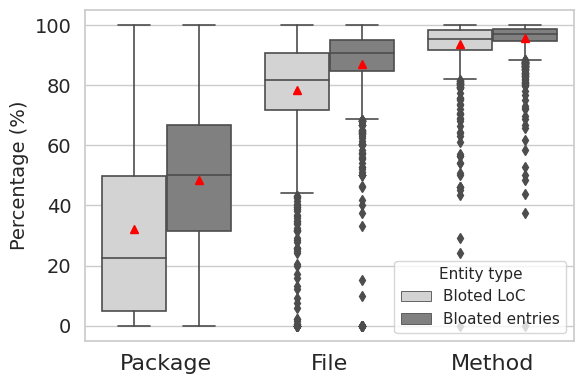

In [3]:
metrics_count = ['PBD', 'PBFD', 'PBMD']
metrics_loc = ['PBD-LOC', 'PBFD-LOC', 'PBMD-LOC']

rename_dict = {
    'PBMD': 'Method',
    'PBD': 'Package',
    'PBFD': 'File',
}

# Melt count metrics

df_count = df[metrics_count].melt(var_name='metric', value_name='value')
df_count['Type'] = 'Bloated entries'

# Melt loc metrics
df_loc = df[metrics_loc].melt(var_name='metric', value_name='value')
df_loc['Type'] = 'Bloted LoC'

# Replace '-LOC' from metric names in loc df
df_loc['metric'] = df_loc['metric'].str.replace('-LOC', '')

# Combine the two melted dataframes
df_melted = pd.concat([df_count, df_loc])

df_melted['metric'] = df_melted['metric'].map(rename_dict)
df_melted['Type'] = pd.Categorical(df_melted['Type'], categories=['Bloted LoC', 'Bloated entries'], ordered=True)

# ax = sns.violinplot(data=df_melted, x="value", y="metric", hue="Type", palette=['blue', 'orange'], split=False,  orient = 'h', inner="box")
ax = sns.boxplot(data=df_melted, x="metric", y="value", hue="Type", 
            orient='v', linewidth=1.2,  palette=['lightgrey', 'grey'],
            showmeans=True,
            meanprops={"marker":"^","markerfacecolor":"red", "markeredgecolor":"red"}) 
# sns.violinplot(data=df_melted, x="value", y="metric", hue="Type", palette=['blue', 'orange'], split=False,  orient = 'h', inner=None, saturation=0.7)

# plt.title("Bloated Entities Analysis", fontsize=18)
ax.legend( title="Entity type", frameon=True, fontsize=11, title_fontsize=11)

plt.xlabel("")
plt.ylabel("Percentage (%)", fontsize=14)
plt.tight_layout()
plt.savefig('figures/rq1.pdf',  bbox_inches='tight',)
plt.show()



In [4]:
df_count

,metric,value,Type
0,PBD,30.00,Bloated entries
1,PBD,0.00,Bloated entries
2,PBD,42.86,Bloated entries
3,PBD,30.77,Bloated entries
4,PBD,44.83,Bloated entries
...,...,...,...
3901,PBMD,100.00,Bloated entries
3902,PBMD,88.74,Bloated entries
3903,PBMD,94.12,Bloated entries
3904,PBMD,87.80,Bloated entries


In [8]:
df["NBD"].sum()

12821